https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [30]:
#Pandas is used for data manipulation
import pandas as pd

#Read in data and display first 5 rows 
features = pd.read_csv('../Data/Train_data_Update.csv', index_col="Start_date")
features.head()

,Year,Count,Days_Open,Avg_Count,News_Count,Vis_change_rate,big_data_newsCount,prev_count,mid_count,after_count,WeekDay,Avg_Tmp,High_Tmp,Low_Tmp,Month,Day
Start_date,,,,,,,,,,,,,,,,
2000-08-11,2000,188046,10,18804.60000,25,0.000000,94,54,26,15,4,26.980000,32.020000,23.360000,8,11
2001-08-11,2001,245338,10,24533.80000,27,0.233523,82,39,28,16,5,25.950000,30.450000,22.150000,8,11
2002-08-09,2002,209510,10,20951.00000,31,-0.171009,77,45,20,12,4,22.580000,25.220000,20.850000,8,9
2003-08-07,2003,151235,11,13748.63636,47,-0.523860,68,27,27,14,3,23.772727,27.700000,20.554545,8,7
2004-07-31,2004,126596,11,11508.72727,86,-0.194627,96,68,16,12,5,28.227273,33.327273,24.363636,7,31


In [2]:
features.describe()

,Year,Count,Days_Open,Avg_Count,News_Count,Vis_change_rate,big_data_newsCount,prev_count,mid_count,after_count,WeekDay,Avg_Tmp,High_Tmp,Low_Tmp,Month,Day
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,2009.500000,178496.681818,6.090909,33805.171831,127.863636,-0.061358,79.136364,44.090909,11.954545,13.409091,3.954545,19.421364,24.995406,14.795751,8.363636,14.772727
std,5.629429,69883.006742,3.279214,14160.907097,127.146820,0.587218,30.656772,21.731936,8.386368,7.896106,0.898532,6.514209,5.842740,7.470025,2.082706,6.823850
min,2000.000000,48000.000000,3.000000,11508.727270,25.000000,-2.164125,36.000000,5.000000,3.000000,2.000000,2.000000,5.333333,10.166667,0.700000,4.000000,6.000000
25%,2005.250000,131292.250000,3.250000,25174.600000,44.000000,-0.320306,62.000000,27.500000,4.250000,8.250000,4.000000,15.010417,20.893750,9.243750,8.000000,9.250000
50%,2009.500000,169005.000000,4.000000,30591.725000,70.000000,0.073953,79.500000,40.000000,10.000000,12.500000,4.000000,17.470833,24.483333,11.516667,8.000000,12.000000
75%,2013.750000,228216.000000,10.000000,43138.124998,167.250000,0.235576,93.250000,60.750000,17.500000,16.750000,4.750000,25.922500,30.207500,22.840000,10.000000,19.000000
max,2019.000000,317012.000000,11.000000,60000.000000,449.000000,0.593809,156.000000,90.000000,28.000000,36.000000,5.000000,29.066667,33.327273,25.600000,11.000000,31.000000


In [3]:
features.columns

Index(['Year', 'Count', 'Days_Open', 'Avg_Count', 'News_Count',
       'Vis_change_rate', 'big_data_newsCount', 'prev_count', 'mid_count',
       'after_count', 'WeekDay', 'Avg_Tmp', 'High_Tmp', 'Low_Tmp', 'Month',
       'Day'],
      dtype='object')

In [4]:
#features.drop("Start_date", axis = 1, inplace=True)
#features.drop("End_date", axis = 1, inplace=True)
features.drop("Year", axis = 1, inplace=True)


In [5]:
#Changing numerical variables into a categorical so that the data has no order 
features.columns
features['Days_Open'] = features['Days_Open'].astype(str)
features['Month'] = features['Month'].astype(str)
features['Day'] = features['Day'].astype(str)
features['WeekDay'] = features['WeekDay'].astype(str)


In [6]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)

# Display the first 5 rows of the last 12 columns
features.iloc[:,5:].head(5)

,prev_count,mid_count,after_count,Avg_Tmp,High_Tmp,Low_Tmp,Days_Open_10,Days_Open_11,Days_Open_3,Days_Open_4,...,Day_18,Day_19,Day_21,Day_22,Day_23,Day_26,Day_31,Day_6,Day_7,Day_9
Start_date,,,,,,,,,,,,,,,,,,,,,
2000-08-11,54,26,15,26.980000,32.020000,23.360000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001-08-11,39,28,16,25.950000,30.450000,22.150000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002-08-09,45,20,12,22.580000,25.220000,20.850000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2003-08-07,27,27,14,23.772727,27.700000,20.554545,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2004-07-31,68,16,12,28.227273,33.327273,24.363636,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [7]:
features.shape

(22, 40)

Now, we need to separate the data into the features and targets. The target, also known as the label, is the value we want to predict, in this case the actual features are all the columns the model uses to make a prediction. We will also convert the Pandas dataframes to Numpy arrays because that is the way the algorithm works. (I save the column headers, which are the names of the features, to a list to use for later visualization).


In [8]:
# Use numpy to convert to arrays
import numpy as np

# Labels are the values we want to predict
labels = np.array(features['Count'])

# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('Count', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

Training and Testing Sets


In [9]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [10]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16, 39)
Training Labels Shape: (16,)
Testing Features Shape: (6, 39)
Testing Labels Shape: (6,)


Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.


In [11]:
# The baseline predictions are the historical averages
# baseline_preds = test_features[:, feature_list.index('Avg_Count')]
# Baseline errors, and display average baseline error
# baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2))

In [12]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [13]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 44501.44 degrees.


In [14]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 69.3 %.


In [17]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [18]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

#### Variable Importances
In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction. The actual calculation of the importance is beyond the scope of this post, but we can use the numbers to make relative comparisons between variables.
The code here takes advantage of a number of tricks in the Python language, namely list comprehensive, zip, sorting, and argument unpacking. It’s not that important to understand these at the moment, but if you want to become skilled at Python, these are tools you should have in your arsenal!

In [19]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: big_data_newsCount   Importance: 0.29
Variable: after_count          Importance: 0.23
Variable: prev_count           Importance: 0.1
Variable: Vis_change_rate      Importance: 0.06
Variable: Days_Open_3          Importance: 0.06
Variable: Avg_Count            Importance: 0.03
Variable: News_Count           Importance: 0.03
Variable: Avg_Tmp              Importance: 0.03
Variable: Low_Tmp              Importance: 0.03
Variable: High_Tmp             Importance: 0.02
Variable: Days_Open_10         Importance: 0.02
Variable: mid_count            Importance: 0.01
Variable: Days_Open_4          Importance: 0.01
Variable: WeekDay_4            Importance: 0.01
Variable: Month_10             Importance: 0.01
Variable: Month_8              Importance: 0.01
Variable: Day_11               Importance: 0.01
Variable: Day_26               Importance: 0.01
Variable: Day_9                Importance: 0.01
Variable: Days_Open_11         Importance: 0.0
Variable: Days_Open_5          Importance:

In [21]:
# New random forest with only the two most important variables
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
# Extract the two most important features
important_indices = [feature_list.index('big_data_newsCount'), feature_list.index('after_count')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]
# Train the random forest
rf_most_important.fit(train_important, train_labels)
# Make predictions and determine the error
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 57901.45 degrees.
Accuracy: 63.77 %.


#### Visualizations
The first chart I’ll make is a simple bar plot of the feature importances to illustrate the disparities in the relative significance of the variables. Plotting in Python is kind of non-intuitive, and I end up looking up almost everything on Stack Overflow when I make graphs. Don’t worry if the code here doesn’t quite make sense, sometimes fully understanding the code isn’t necessary to get the end result you want!


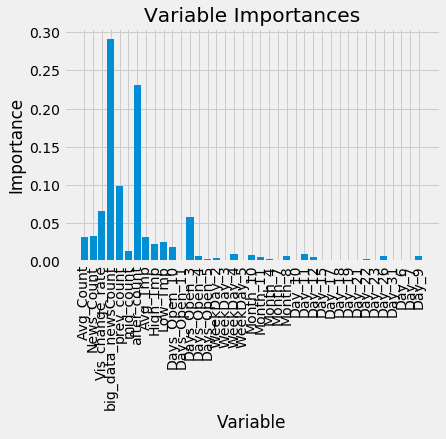

In [22]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Next, we can plot the entire dataset with predictions highlighted. This requires a little data manipulation, but its not too difficult. We can use this plot to determine if there are any outliers in either the data or our predictions.


In [24]:
# Use datetime for creating date objects for plotting
import datetime
# Dates of training values
months = features[:, feature_list.index('Av')]
days = features[:, feature_list.index('day')]
years = features[:, feature_list.index('year')]
# List and then convert to datetime object
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
# Dates of predictions
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
# Column of dates
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
# Convert to datetime objects
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
# Plot the actual values
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');

ValueError: 'Month' is not in list

In [28]:
# Make the data accessible for plotting
true_data['big_data_newsCount'] = features[:, feature_list.index('big_data_newsCount')]
true_data['after_count'] = features[:, feature_list.index('after_count')]
true_data['prev_count'] = features[:, feature_list.index('prev_count')]
# Plot all the data as lines
plt.plot(true_data['date'], true_data['actual'], 'b-', label  = 'actual', alpha = 1.0)
plt.plot(true_data['date'], true_data['temp_1'], 'y-', label  = 'temp_1', alpha = 1.0)
plt.plot(true_data['date'], true_data['average'], 'k-', label = 'average', alpha = 0.8)
plt.plot(true_data['date'], true_data['friend'], 'r-', label = 'friend', alpha = 0.3)
# Formatting plot
plt.legend(); plt.xticks(rotation = '60');
# Lables and title
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual Max Temp and Variables');

['Avg_Count',
 'News_Count',
 'Vis_change_rate',
 'big_data_newsCount',
 'prev_count',
 'mid_count',
 'after_count',
 'Avg_Tmp',
 'High_Tmp',
 'Low_Tmp',
 'Days_Open_10',
 'Days_Open_11',
 'Days_Open_3',
 'Days_Open_4',
 'Days_Open_5',
 'WeekDay_2',
 'WeekDay_3',
 'WeekDay_4',
 'WeekDay_5',
 'Month_10',
 'Month_11',
 'Month_4',
 'Month_7',
 'Month_8',
 'Day_10',
 'Day_11',
 'Day_12',
 'Day_15',
 'Day_17',
 'Day_18',
 'Day_19',
 'Day_21',
 'Day_22',
 'Day_23',
 'Day_26',
 'Day_31',
 'Day_6',
 'Day_7',
 'Day_9']